# Introduction

## Project description
This project is about classifying customers with RFM technique. Used data is actual transactions from UK retailer from 2010 and 2011 (https://archive.ics.uci.edu/dataset/352/online+retail)
This dataset includes a wide range of souvenir and gift products, mainly aimed at corporate clients.

**Goal**

The primary goal of this project is to develop a model that can predict purchases that will be made by a new customer during the next and current years, starting with his first purchase. To achive that the main step will be classifying customers based on dataset.

In addition this project demonstrates author's ability to perform customer analysis and tailor marketing strategies accordingly.



# Data preporation

In [ ]:
#  importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import plotly.graph_objects as go
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from collections import Counter

In [ ]:
# load dataset
df = pd.read_excel('Online_Retail.xlsx', sheet_name='Online Retail')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Description of the variables:

* `InvoiceNo`: unique identified invoice number. Invoice numbers prefixed with "C" indicate refund transactions.
* `StockCode`: unique code assigned to each item in the registry.
* `Description`: description of the item being purchased.
* `Quantity`: quantity of items in the transaction.
* `InvoiceDate`: date and time of the purchase transaction.
* `UnitPrice`: price of a single item in Sterling currency.
* `CustomerID`: unique identifier of each customer.
* `Country`: country of residence of the customer.

In the next block of code you can see that in the used data we have approximately 276175 rows of data, but in column `CustomerID` there are a lot of null values. Let's explore that.



In [ ]:
# retrieve basic information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
n_rows, n_col = df.shape

print(f'# of missing values in column CustomerID: {df.CustomerID.isnull().sum()}')
print(f'% of missing values in column CustomerID: {df.CustomerID.isnull().sum()/n_rows:.2%}')
print()
print(f'# of missing values in column Description: {df.Description.isnull().sum()}')
print(f'% of missing values in column Description: {df.Description.isnull().sum()/n_rows:.2%}')

# of missing values in column CustomerID: 135080
% of missing values in column CustomerID: 24.93%

# of missing values in column Description: 1454
% of missing values in column Description: 0.27%


In [ ]:
# let's look at rows with null in CustomerID
df[df.CustomerID.isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


About 25% of the entries are not assigned to a particular customer. CustomerID is required for our further analysis and we can't retrieve it from other columns in used dataset. Therefore, rows with missing data will be deleted.

In [ ]:
df.dropna(axis=0, subset=['CustomerID'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [ ]:
print(f'% of missing values in column CustomerID: {df.CustomerID.isnull().sum()/n_rows:.1%}')
print()
print(f'% of missing values in column Description: {df.Description.isnull().sum()/n_rows:.1%}')

% of missing values in column CustomerID: 0.0%

% of missing values in column Description: 0.0%


In [ ]:
# check for duplicates
print(f'# of duplicated values in data: {df.duplicated().sum()}')

# of duplicated values in data: 5225


In the block of code below you can see that in duplicated row to the same items, they are in the same Invoice, the same InvoiceDate with the same Quantity. It was decided to delete duplicates.

In [ ]:
df[df.duplicated(keep=False)].sort_values(by=['Description', 'InvoiceNo']).head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
160498,550459,72800B,4 PURPLE FLOCK DINNER CANDLES,1,2011-04-18 13:17:00,2.55,18116.0,United Kingdom
160509,550459,72800B,4 PURPLE FLOCK DINNER CANDLES,1,2011-04-18 13:17:00,2.55,18116.0,United Kingdom
483390,577503,72800B,4 PURPLE FLOCK DINNER CANDLES,1,2011-11-20 12:34:00,2.55,18110.0,United Kingdom
483414,577503,72800B,4 PURPLE FLOCK DINNER CANDLES,1,2011-11-20 12:34:00,2.55,18110.0,United Kingdom
460074,575895,23345,DOLLY GIRL BEAKER,1,2011-11-11 14:50:00,1.25,17052.0,United Kingdom
460098,575895,23345,DOLLY GIRL BEAKER,1,2011-11-11 14:50:00,1.25,17052.0,United Kingdom
503147,578921,23345,DOLLY GIRL BEAKER,1,2011-11-27 11:57:00,1.25,13596.0,United Kingdom
503199,578921,23345,DOLLY GIRL BEAKER,1,2011-11-27 11:57:00,1.25,13596.0,United Kingdom
531657,580958,23345,DOLLY GIRL BEAKER,2,2011-12-06 14:30:00,1.25,17266.0,United Kingdom
531669,580958,23345,DOLLY GIRL BEAKER,2,2011-12-06 14:30:00,1.25,17266.0,United Kingdom


In [ ]:
df.drop_duplicates(inplace=True)

There are 39 lines where the price is 0. We will delete these rows for ease of analysis.

In [ ]:
df['UnitPrice'].min()

0.0

In [ ]:
len(df[df['UnitPrice'] == 0])

40

In [ ]:
df.drop(df[df['UnitPrice'] == 0].index, inplace=True)

Lastly, we will change type in `InvoiceDate` column to dtype


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Exploring the data

First of all, we will look at the quantity of customers, their orders and company's products.

In [ ]:
print(f'There are {df.CustomerID.nunique()} unique customers.')
print(f'{df.InvoiceNo.nunique()} orders were made')
print(f'Total number of unique products: {df.StockCode.nunique()}')

There are 4371 unique customers.
22186 orders were made
Total number of unique products: 3684


Let's look at the customer's "baskets". What we see:

* the presence of data with the prefix **C** for the InvoiceNo variable: this indicates transactions were canceled
* the presence of users who only came once and purchased only one product (CustomerID = 12346)
* the presence of customers that buy a large number of items at each order

In [ ]:
n_prod_per_order = df.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count().rename(columns = {'InvoiceDate':'N_products'})
n_prod_per_order.head(10)

,CustomerID,InvoiceNo,N_products
0,12346.0,541431,1
1,12346.0,C541433,1
2,12347.0,537626,31
3,12347.0,542237,29
4,12347.0,549222,24
5,12347.0,556201,18
6,12347.0,562032,22
7,12347.0,573511,47
8,12347.0,581180,11
9,12348.0,539318,17


**Exploring cancelled orders**

First, we will count the number of cancellation transactions:

In [ ]:
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

In [ ]:
df['cancelled_order'] = df['InvoiceNo'].apply(lambda x: 'C' in x)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancelled_order
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False


In [ ]:
print(f'Number of cancelled orders: {df.cancelled_order.sum()}')
print(f'Percentage of cancelled orders: {df.cancelled_order.sum() / len(df):.2%}')

Number of cancelled orders: 8872
Percentage of cancelled orders: 2.21%


In [ ]:
df[df['cancelled_order']].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancelled_order
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,True
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,True
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,True
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,True


Considering the project's aim to cluster customers based on their purchasing behavior and preferences and to eventually create a recommendation system, it's important to understand the cancellation patterns of customers. Therefore, the strategy is to **keep** these cancelled transactions in the dataset, marking them distinctly to facilitate further analysis. This also will allow the recommendation system to possibly prevent suggesting products that have a high likelihood of being cancelled, thus improving the recommendation sistem.

**Exploring different StockCodes**


In [ ]:
unique_stock_codes = df['StockCode'].unique()
anomalous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 1)]

print("Anomalous stock codes:")
print("-"*22)
for code in anomalous_stock_codes:
    print(code)

Anomalous stock codes:
----------------------
POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


There are some unique StockCodes that were in the dataset:

* POST            -> POSTAGE                       
* D               -> Discount                      
* C2              -> CARRIAGE                      
* M               -> Manual                        
* BANK CHARGES    -> Bank Charges                  
* PADS            -> PADS TO MATCH ALL CUSHIONS    
* DOT             -> DOTCOM POSTAGE
* CRUK            -> CRUK Commission


In [ ]:
percentage_anomalous = (df['StockCode'].isin(anomalous_stock_codes).sum() / len(df)) * 100

print(f'The percentage of rows with unusual stock codes in the data: {percentage_anomalous:.2f}%')

The percentage of rows with unusual stock codes in the data: 0.48%


We found out that a very small proportion of the records, 0.48%, have unusual stock codes. These unusual codes are only a small part of all the unique stock codes (only 8 out of 3684).

These codes seem to represent non-product transactions like "BANK CHARGES", "POST" (possibly postage fees), etc. Since they do not represent actual products and are a very small proportion of the dataset, including them in the analysis might introduce noise and distort the clustering and recommendation system. So it would be advisable to **exclude** these records with an abnormal stockcodes from the dataset.

In [ ]:
df = df[~df['StockCode'].isin(anomalous_stock_codes)]

**Exploring products**

We will show top 10 most preferred products (best-sellers)

The most frequently purchased item was white t-light holder with slightly more than 1,900 items sold. This was followed by a cake stand, which was also popular among customers. The top ten list also includes several types of cake stands and various home decorations (buntings and ornaments), also there are couple of lunch bags.

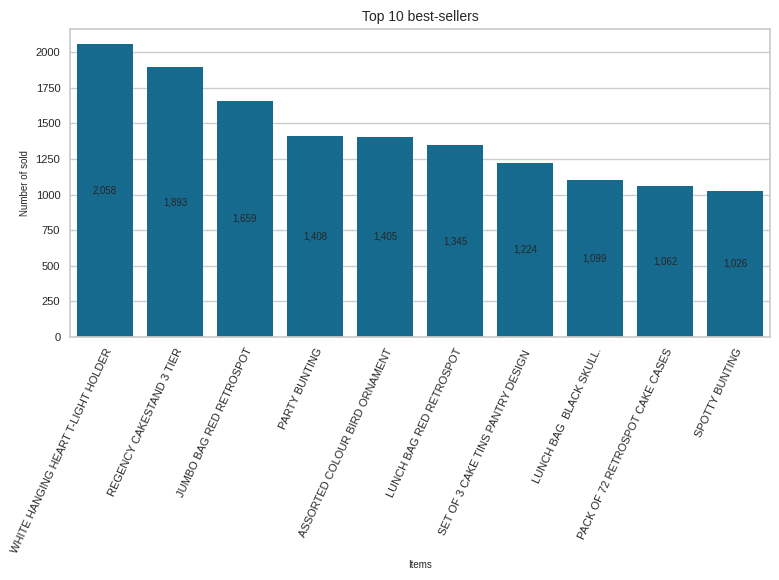

In [ ]:
most_preferred_products = df['Description'].value_counts().reset_index().rename(
    columns={'index':'Item', 'Description':'Number_of_sold'}).head(10)

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=most_preferred_products, x='Item',
             y='Number_of_sold',
                 color='#90D26D')
plt.xticks(rotation=65, fontsize=8,rotation_mode='anchor',ha='right')
plt.title('Top 10 best-sellers', fontsize=10)
plt.yticks(fontsize=8)
plt.tight_layout()
ax.bar_label(ax.containers[0],label_type='center', fontsize=7, fmt='{:,.0f}')
plt.xlabel('Items', fontsize=7)
plt.ylabel('Number of sold', fontsize=7)
plt.show()

**Exploring descriptions**

Let's dive into descriptions of items. In the previous graph, we can see that the description of the products is written in uppercase - so this style is standardized format. Thus we can look at the dataset for different descriptions with lowercase letters.

In [ ]:
# Find unique descriptions containing lowercase characters
lowercase_descriptions = df['Description'].unique()
lowercase_descriptions = [desc for desc in lowercase_descriptions if any(char.islower() for char in desc)]

# Print the unique descriptions containing lowercase characters
print("The unique descriptions containing lowercase characters are:")
print("-"*60)
for desc in lowercase_descriptions:
    print(desc)

The unique descriptions containing lowercase characters are:
------------------------------------------------------------
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


When viewing descriptions containing lowercase characters, it becomes obvious that some entries are not product descriptions, such as "Next Day Carriage" and "High Resolution Image". These records do not appear to be related to the actual products and may represent other types of information or information about services.

We will remove the rows where the descriptions contain service-related information like "Next Day Carriage" and "High Resolution Image".
Also for the remaining descriptions with mixed case, standardize the text to uppercase to maintain uniformity across the dataset.

In [ ]:
service_related_descriptions = ['Next Day Carriage', 'High Resolution Image']
service_related_percentage = df[df['Description'].isin(service_related_descriptions)].shape[0] / df.shape[0] * 100

print(f'The percentage of records with service-related descriptions in the dataset is: {service_related_percentage:.2f}%')

The percentage of records with service-related descriptions in the dataset is: 0.02%


In [ ]:
df = df[~df['Description'].isin(service_related_descriptions)]
df['Description'] = df['Description'].str.upper()

**Exploring basket prices**

Let's create a new variable that indicates the total price of every invoice by each customer:

In [ ]:
# first, let's count price of one item (unitprice multiply by quantity)
df['Total_price'] = df['UnitPrice'] * df['Quantity']
df.sort_values('CustomerID').head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancelled_order,Total_price
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,False,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,True,-77183.6
220588,556201,22727,ALARM CLOCK BAKELIKE RED,8,2011-06-09 13:01:00,3.75,12347.0,Iceland,False,30.0
148303,549222,22492,MINI PAINT SET VINTAGE,36,2011-04-07 10:43:00,0.65,12347.0,Iceland,False,23.4
148304,549222,84559A,3D SHEET OF DOG STICKERS,12,2011-04-07 10:43:00,0.85,12347.0,Iceland,False,10.2


In [ ]:
# now, we will count basket price (summary of all prices in one invoice)
df['basket_price'] = df['Total_price'].groupby(df['InvoiceNo']).transform('sum')

The average basket price is 468 pounds, while the median value is 302 pounds sterling. This is due to the large difference between the lowest and highest priced orders - the lowest is less than 1 pound sterling, while the highest is more than 77,000 pounds sterling.

In [ ]:
df_baskets = df.groupby(by=['CustomerID', 'InvoiceNo','InvoiceDate'], as_index=False)['Total_price'].sum().rename(columns = {'Total_price':'basket_price'})
df_baskets[df_baskets['basket_price']>0]['basket_price'].describe()

count     18429.000000
mean        474.035522
std        1677.482947
min           0.380000
25%         156.600000
50%         301.480000
75%         462.810000
max      168469.600000
Name: basket_price, dtype: float64

Let's plot data about total price.

In [ ]:
df_baskets['date'] = df_baskets['InvoiceDate'].dt.strftime('%m/%d/%Y')
df_baskets['month'] = df_baskets['InvoiceDate'].dt.strftime('%B')
df_baskets['weekday'] = df_baskets['InvoiceDate'].dt.strftime('%A')
df_baskets['hour'] = df_baskets['InvoiceDate'].dt.strftime('%H')

On the chart, you can see that the highest average basket price is in September and the lowest is in April. There is also a significant increase in the average cost of baskets in the autumn compared to the summer and spring.

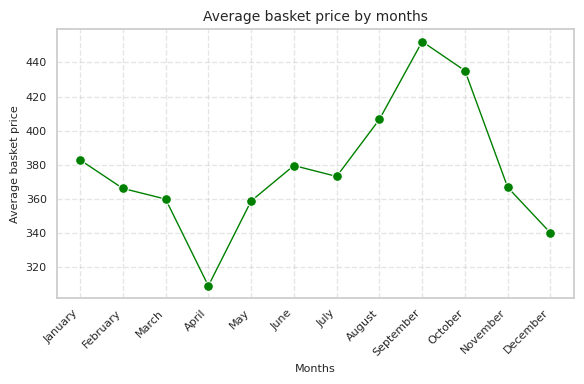

In [ ]:
df_months = df_baskets.groupby('month').agg({'basket_price':
                                           'mean'}).reset_index()
# sorting according to months
df_months['month'] = pd.Categorical(df_months['month'], ['January', 'February',
                                                         'March', 'April', 'May',
                                                         'June', 'July', 'August',
                                                         'September', 'October',
                                                         'November', 'December'])

sns.set_style("whitegrid")

plt.figure(figsize=(6, 4))
sns.lineplot(data=df_months, x='month', y='basket_price',
             marker='o', color='green', linewidth=1)
plt.title('Average basket price by months', fontsize=10)
plt.xlabel('Months', fontsize=8)
plt.ylabel('Average basket price', fontsize=8)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

If we look at the distribution of average basket prices by day of the week, we can see that the lowest average price occurs on Sunday and the highest on Tuesday. This is not surprising, as Sunday is a day off and Tuesday marks the peak of a working week.

There is no data for purchases on Saturday in our dataset. It is possible that there were errors during data unload or that customers of this online store simply do not make purchases on Saturdays.

The average cost of a basket on Friday seems to be quite high. Perhaps people are feeling less motivated to work on Fridays and prefer to make online orders instead.

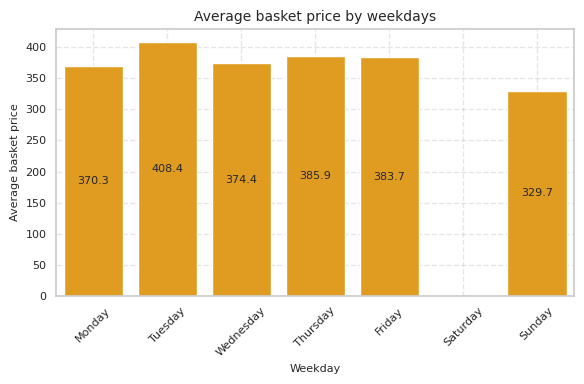

In [ ]:
daywise = df_baskets.groupby('weekday').agg({'basket_price': 'mean'}).reset_index()

# sorting according to weekdays
daywise['weekday'] = pd.Categorical(daywise['weekday'], categories=['Monday',
                                                                    'Tuesday',
                                                                    'Wednesday',
                                                                    'Thursday',
                                                                    'Friday',
                                                                    'Saturday',
                                                                    'Sunday'])

# Line plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=daywise,x=daywise['weekday'], y=daywise['basket_price']
            , color='#90D26D', linewidth=1)
plt.title('Average basket price by weekdays', fontsize=10)
plt.xlabel('Weekday', fontsize=8)
plt.ylabel('Average basket price', fontsize=8)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
ax.bar_label(ax.containers[0],label_type='center', fontsize=8, fmt='{:,.1f}')
plt.show()

**Exploring countries**

Lastly, let's look on countries from which orders were made.

The largest number of orders came from the UK, more than 40 times the second-largest number of orders from Germany. Almost all the orders were placed by customers from European countries.

In [ ]:
df_countries = pd.pivot_table(df, values='CustomerID',
                       index=['Country'],
                       aggfunc=lambda x:
                       len(x.unique())).sort_values(by='CustomerID',
                                                    ascending=False).reset_index()
df_countries = df_countries.rename(columns={'CustomerID':'Counter'})

print(f'There are {len(df_countries)} countries in the dataset')

There are 37 countries in the dataset


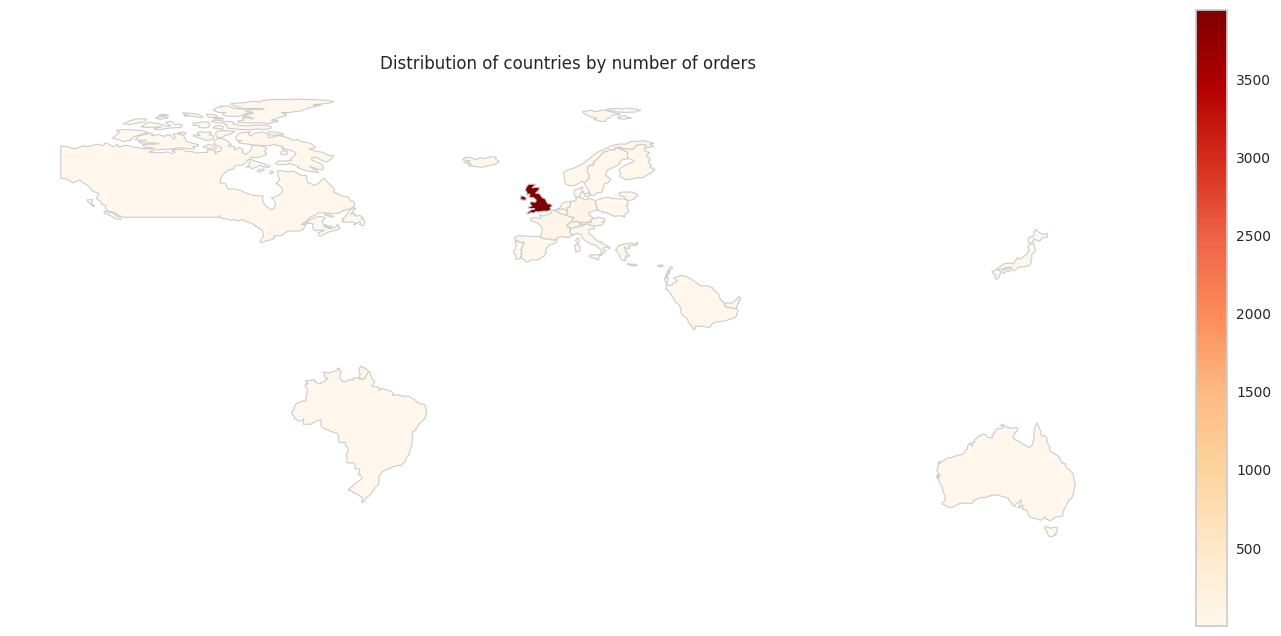

In [ ]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(df_countries, how='left', left_on='name', right_on='Country')

fig, ax = plt.subplots(1, 1, figsize=(18, 8))
world.plot(column='Counter', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Distribution of countries by number of orders')
ax.set_axis_off()

plt.show()

In [ ]:
# Resetting the index of the cleaned dataset
df.reset_index(drop=True, inplace=True)

# Classifying customers

## RFM (Recency, Frequency, and Monetary Value)

RFM is a method used to analyze and segment customer behaviors. RFM stands for Recency, Frequency, and Monetary Value.

* **Recency**: how recently a customer has made a purchase. More recent customers are considered more valuable.

* **Frequency**: how often a customer makes purchases within a specific time period. Customers who make frequent purchases are typically considered more loyal or engaged.

* **Monetary Value**: the total value of purchases made by a customer within a specific time period. Customers who spend more money are generally more valuable to the business.

In this project we will unclude some extra metrics based on the used data:
* **Product diversity**: the number of distinct products bought by a customer
* **Behavioral features**: the average number of days a customer waits before making another purchase and the day of the week / hour of the day when the customer shops the most
* **Geographic features**: the country where each customer is located
* **Cancellation insights**: the total number of transactions a customer has canceled and the proportion of transactions that a customer has canceled out of all their transactions
* **Seasonality and trends**: the average amount a customer spends monthly, the variability in a customer's monthly spending and the slope of the linear trend line fitted to their spending data

RFM analysis is conducted by **assigning scores or rankings** to each customer based on these three metrics. Customers are then grouped into segments based on their RFM scores.

These segments can be used to develop marketing strategies and campaigns to better target and meet the needs of different customer groups.

Instances include providing loyalty programs or exclusive incentives to customers exhibiting high RFM scores (indicating recent, frequent, and high-value purchases) to foster repeat transactions. On the contrary, customers with low RFM scores (suggesting infrequent and low-value purchases) may be approached with re-engagement campaigns aimed at stimulating further purchases.

### Metrics and features

#### Recency

To study this, we will calculate
1. `Days since last purchase`. This feature represents the number of days that have passed since the customer's last purchase.

In [ ]:
customer_data = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
most_recent_date = df['InvoiceDate'].max()

customer_data['Days_since_last_purchase'] = (most_recent_date - customer_data['InvoiceDate']).dt.days

customer_data.drop(columns=['InvoiceDate'], inplace=True)

In [ ]:
customer_data.head()

,CustomerID,Days_since_last_purchase
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


#### Frequency

Let's create two variables to look at customer's frequency:

1.   Total transaction made by a customer (`Total_transactions`)
2.   Total products purchased, in other words, the total number of products (sum of quantities) purchased by a customer across all transactions (`Total_products_purchased`)

In [ ]:
# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Total_transactions'}, inplace=True)

# Calculate the total number of products purchased by each customer
total_products_purchased = df.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns={'Quantity': 'Total_products_purchased'}, inplace=True)

customer_data = pd.merge(customer_data, total_transactions, on='CustomerID')
customer_data = pd.merge(customer_data, total_products_purchased, on='CustomerID')
customer_data.head()

,CustomerID,Days_since_last_purchase,Total_transactions,Total_products_purchased
0,12346.0,325,2,0
1,12347.0,1,7,2458
2,12348.0,74,4,2332
3,12349.0,18,1,630
4,12350.0,309,1,196


#### Monetary

In this step we're going to create two features to understand the monetary aspect of customer's transactions:

1. Total amount of money spent by each customer (`Total_price`)
2. Average transaction value (Total Spend divided by the Total Transactions for each customer) -`Average_transaction_value`

In [ ]:
# Calculate the total spend by each customer
total_spend = df.groupby('CustomerID')['Total_price'].sum().reset_index()

# Calculate the average transaction value for each customer
average_transaction_value = total_spend.merge(total_transactions, on='CustomerID')
average_transaction_value['Average_transaction_value'] = average_transaction_value['Total_price'] / average_transaction_value['Total_transactions']

customer_data = pd.merge(customer_data, total_spend, on='CustomerID')
customer_data = pd.merge(customer_data, average_transaction_value[['CustomerID', 'Average_transaction_value']], on='CustomerID')
customer_data.head()

,CustomerID,Days_since_last_purchase,Total_transactions,Total_products_purchased,Total_price,Average_transaction_value
0,12346.0,325,2,0,0.00,0.000000
1,12347.0,1,7,2458,4310.00,615.714286
2,12348.0,74,4,2332,1437.24,359.310000
3,12349.0,18,1,630,1457.55,1457.550000
4,12350.0,309,1,196,294.40,294.400000


#### Product diversity feature

Understanding product diversity can help you develop personalized marketing strategies and product recommendations. So we will calculate:

1. `Unique_products_purchased`: the number of distinct products bought by a customer. A higher value indicates that the customer has a versatile taste to wide range of products, while a lower value might indicate specific preferences.

In [ ]:
# Calculate the number of unique products purchased by each customer
unique_products_purchased = df.groupby('CustomerID')['StockCode'].nunique().reset_index()
unique_products_purchased.rename(columns={'StockCode': 'Unique_products_purchased'}, inplace=True)

customer_data = pd.merge(customer_data, unique_products_purchased, on='CustomerID')
customer_data.head()

,CustomerID,Days_since_last_purchase,Total_transactions,Total_products_purchased,Total_price,Average_transaction_value,Unique_products_purchased
0,12346.0,325,2,0,0.00,0.000000,1
1,12347.0,1,7,2458,4310.00,615.714286,103
2,12348.0,74,4,2332,1437.24,359.310000,21
3,12349.0,18,1,630,1457.55,1457.550000,72
4,12350.0,309,1,196,294.40,294.400000,16


#### Behavioral features

By including these behavioral features, we can create a more complete view of our customers, which will potentially increase the efficiency of the clustering algorithm.

1. Average Days Between Purchases (`Average_days_between_purchases`)
2. Favorite Shopping Day (`Day_of_week`)
3. Favorite Shopping Hour (`Hour`)


In [ ]:
df['Day_of_week'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

# Calculate the average number of days between consecutive purchases
days_between_purchases = df.groupby('CustomerID')['InvoiceDate'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns={'InvoiceDate': 'Average_days_between_purchases'}, inplace=True)

# Find the favorite shopping day of the week
favorite_shopping_day = df.groupby(['CustomerID', 'Day_of_week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_of_week']]

# Find the favorite shopping hour of the day
favorite_shopping_hour = df.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]

customer_data = pd.merge(customer_data, average_days_between_purchases, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_day, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='CustomerID')
customer_data.head()

,CustomerID,Days_since_last_purchase,Total_transactions,Total_products_purchased,Total_price,Average_transaction_value,Unique_products_purchased,Average_days_between_purchases,Day_of_week,Hour
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10
1,12347.0,1,7,2458,4310.00,615.714286,103,2.000000,1,14
2,12348.0,74,4,2332,1437.24,359.310000,21,10.846154,3,19
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9
4,12350.0,309,1,196,294.40,294.400000,16,0.000000,2,16


#### Geographic features

Different regions might have varying preferences and purchasing behaviors which can be critical in personalizing marketing strategies and inventory planning. Thus, we will add another metric - `Country`

In [ ]:
df['Country'].value_counts(normalize=True).reset_index(name='%').head().rename(columns={'index':'Country'})

,Country,%
0,United Kingdom,0.890971
1,Germany,0.022722
2,France,0.020402
3,EIRE,0.018440
4,Spain,0.006162


Due to the fact that almost 90% of the dataset is purchases from the UK, we will create a column in which we will mark whether the order was made from the UK (1) or not (0).

In [ ]:
# Group by CustomerID and Country to get the number of transactions per country for each customer
customer_country = df.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_transactions')

# Get the country with the maximum number of transactions for each customer (in case a customer has transactions from multiple countries)
customer_main_country = customer_country.sort_values('Number_of_transactions', ascending=False).drop_duplicates(['CustomerID'])

customer_main_country['Is_UK'] = customer_main_country['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)

customer_data = pd.merge(customer_data, customer_main_country[['CustomerID', 'Is_UK']], on='CustomerID', how='left')
customer_data['Is_UK'].value_counts()

1    3866
0     416
Name: Is_UK, dtype: int64

#### Cancellation patterns

For understanding in cancellation patterns of customers to then gain insights that can enhance our customer segmentation model these features will be counted:

1. Cancellation frequency: the total number of transactions a customer has canceled (`Cancellation_frequency`)
2. Cancellation rate: the proportion of transactions that a customer has canceled out of all their transactions (`Cancellation_rate`)


In [ ]:
# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Calculate the number of cancelled transactions for each customer
cancelled_transactions = df[df['cancelled_order']]
cancellation_frequency = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancellation_frequency.rename(columns={'InvoiceNo': 'Cancellation_frequency'}, inplace=True)
customer_data = pd.merge(customer_data, cancellation_frequency, on='CustomerID', how='left')

customer_data['Cancellation_frequency'].fillna(0, inplace=True)
customer_data['Cancellation_rate'] = customer_data['Cancellation_frequency'] / total_transactions['InvoiceNo']
customer_data.head()

,CustomerID,Days_since_last_purchase,Total_transactions,Total_products_purchased,Total_price,Average_transaction_value,Unique_products_purchased,Average_days_between_purchases,Day_of_week,Hour,Is_UK,Cancellation_frequency,Cancellation_rate
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.5
1,12347.0,1,7,2458,4310.00,615.714286,103,2.000000,1,14,0,0.0,0.0
2,12348.0,74,4,2332,1437.24,359.310000,21,10.846154,3,19,0,0.0,0.0
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.0
4,12350.0,309,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.0


#### Seasonality

Let's add seasonality in to analyse customers' purchasing behaviors

1. Monthly spending mean: the average amount a customer spends monthly (`Monthly_spending_mean`)
2. Monthly spending std: the variability in a customer's monthly spending (`Monthly_spending_std`)

In [ ]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

monthly_spending = df.groupby(['CustomerID', 'Year', 'Month'])['Total_price'].sum().reset_index()

seasonal_buying_patterns = monthly_spending.groupby('CustomerID')['Total_price'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_spending_mean', 'std': 'Monthly_spending_std'}, inplace=True)
seasonal_buying_patterns['Monthly_spending_std'].fillna(0, inplace=True)

customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='CustomerID')
customer_data.head()

,CustomerID,Days_since_last_purchase,Total_transactions,Total_products_purchased,Total_price,Average_transaction_value,Unique_products_purchased,Average_days_between_purchases,Day_of_week,Hour,Is_UK,Cancellation_frequency,Cancellation_rate,Monthly_spending_mean,Monthly_spending_std
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.5,0.000000,0.000000
1,12347.0,1,7,2458,4310.00,615.714286,103,2.000000,1,14,0,0.0,0.0,615.714286,341.070789
2,12348.0,74,4,2332,1437.24,359.310000,21,10.846154,3,19,0,0.0,0.0,359.310000,203.875689
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.0,1457.550000,0.000000
4,12350.0,309,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.0,294.400000,0.000000


We have created a dataset that focuses on customers, using a variety of new features that give us a deeper understanding of their buying patterns and preferences.

In [ ]:
# Changing the data type of 'CustomerID' to string as it is a unique identifier and not used in mathematical operations
customer_data['CustomerID'] = customer_data['CustomerID'].astype(str)

In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4282 entries, 0 to 4281
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      4282 non-null   object 
 1   Days_since_last_purchase        4282 non-null   int64  
 2   Total_transactions              4282 non-null   int64  
 3   Total_products_purchased        4282 non-null   int64  
 4   Total_price                     4282 non-null   float64
 5   Average_transaction_value       4282 non-null   float64
 6   Unique_products_purchased       4282 non-null   int64  
 7   Average_days_between_purchases  4282 non-null   float64
 8   Day_of_week                     4282 non-null   int64  
 9   Hour                            4282 non-null   int64  
 10  Is_UK                           4282 non-null   int64  
 11  Cancellation_frequency          4282 non-null   float64
 12  Cancellation_rate               42

**Dataset Description**:

* `CustomerID`: Identifier uniquely assigned to each customer.
* `Days_since_last_purchase`: The number of days that have passed since the customer's last purchase.
* `Total_transactions`: The total number of transactions made by the customer.
* `Total_products_purchased`: The total quantity of products purchased by a customer.
* `Total_price`: The total amount of money the customer has spent.
* `Average_transaction_value`: The average value of the customer's transactions.
* `Unique_products_purchased`: The number of different products the customer has purchased.
* `Average_days_between_purchases`: The average number of days between consecutive purchases made by the customer.
* `Day_of_week`: The day of the week when the customer prefers to shop.
* `Hour`: The hour of the day when the customer prefers to shop.
* `Is_UK`: A binary variable indicating whether the customer is based in the UK (1) or not (0).
* `Cancellation_frequency`: The total number of transactions that the customer has cancelled.
* `Cancellation_rate`: The proportion of transactions that the customer has cancelled.
* `Monthly_spending_mean`: The average monthly spending of the customer.
* `Monthly_spending_std`: The standard deviation of the customer's monthly spending.

### Exploratory analysis on the new dataset

In this section, we will be looking at our new dataset in order to study outliers, which have the potential to significantly influence the results of our cluster analysis.

Because the new data is multidimensional we are going to use Isolation Forest algorithm.

Isolation Forest is an unsupervised machine learning algorithm for anomaly detection. In order to isolate a data point, the algorithm recursively generates partitions on the sample by randomly selecting an attribute and then randomly selecting a split value between the minimum and maximum values allowed for that attribute.

In [ ]:
model = IsolationForest(random_state=0)

# Fitting the model
customer_data['Outlier_scores'] = model.fit_predict(customer_data.iloc[:, 1:].to_numpy())
customer_data['Is_outlier'] = [1 if x==-1 else 0 for x in customer_data['Outlier_scores']]
customer_data.head()

,CustomerID,Days_since_last_purchase,Total_transactions,Total_products_purchased,Total_price,Average_transaction_value,Unique_products_purchased,Average_days_between_purchases,Day_of_week,Hour,Is_UK,Cancellation_frequency,Cancellation_rate,Monthly_spending_mean,Monthly_spending_std,Outlier_scores,Is_outlier
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.5,0.000000,0.000000,1,0
1,12347.0,1,7,2458,4310.00,615.714286,103,2.000000,1,14,0,0.0,0.0,615.714286,341.070789,1,0
2,12348.0,74,4,2332,1437.24,359.310000,21,10.846154,3,19,0,0.0,0.0,359.310000,203.875689,1,0
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.0,1457.550000,0.000000,-1,1
4,12350.0,309,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.0,294.400000,0.000000,1,0


Let's plot the distribution of these outliers scores and the percentages of inliers and outliers detected by the model

In [ ]:
outlier_percentage = customer_data['Is_outlier'].value_counts(normalize=True)

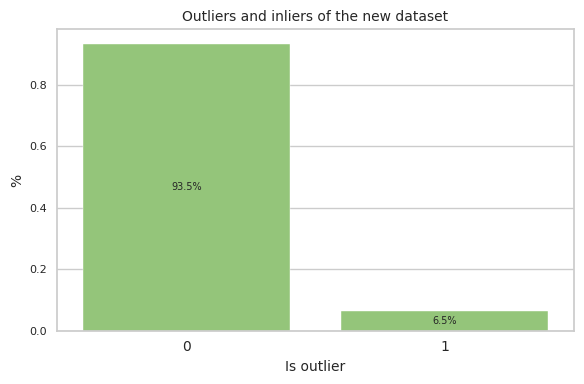

In [ ]:
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=outlier_percentage, color='#90D26D')
plt.title('Outliers and inliers of the new dataset', fontsize=10)
plt.yticks(fontsize=8)
ax.bar_label(ax.containers[0], label_type='center', fontsize=7, fmt='{:.1%}')
plt.xlabel('Is outlier', fontsize=10)
plt.ylabel('%', fontsize=10)
plt.tight_layout()
plt.show()

From the above analysis, we can see that approximately 8% of our customers have been identified as outliers in the dataset. This number seems to be a reasonable proportion, this suggests that our isolation forest algorithm has performed well.

It is important in case of our analysis to handle these outliers for preventing them from affecting the clusters quality. Consequently, we will:
1. Split the identified outliers and save them as a separate file.
2. Remove the outliers from the main dataset (`df`).
3. Drop the `Outlier_scores` and `Is_outlier` columns as they were assistive columns used for the outlier detection process.

In [ ]:
outliers_data = customer_data[customer_data['Is_outlier']==1]

customer_data_cleaned = customer_data[customer_data['Is_outlier']==0]
customer_data_cleaned = customer_data_cleaned.drop(columns=['Outlier_scores', 'Is_outlier'])

customer_data_cleaned.reset_index(drop=True, inplace=True)

In [ ]:
customer_data_cleaned.shape[0]

4003

### Correlation analysis

Before clustering, we must check the correlation between features for presence of multicollinearity.

In [ ]:
corr = customer_data_cleaned.drop(columns=['CustomerID']).corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Days_since_last_purchase,Total_transactions,Total_products_purchased,Total_price,Average_transaction_value,Unique_products_purchased,Average_days_between_purchases,Day_of_week,Hour,Is_UK,Cancellation_frequency,Cancellation_rate,Monthly_spending_mean,Monthly_spending_std
Days_since_last_purchase,1.00,-0.37,-0.34,-0.35,-0.07,-0.34,-0.12,-0.01,-0.01,-0.01,-0.19,-0.15,-0.14,-0.29
Total_transactions,-0.37,1.00,0.70,0.78,-0.06,0.55,0.03,0.00,-0.05,0.03,0.63,0.43,0.16,0.44
Total_products_purchased,-0.34,0.70,1.00,0.88,0.33,0.56,-0.01,-0.01,-0.05,-0.00,0.35,0.23,0.48,0.54
Total_price,-0.35,0.78,0.88,1.00,0.38,0.59,-0.04,-0.01,-0.05,-0.01,0.42,0.29,0.55,0.61
Average_transaction_value,-0.07,-0.06,0.33,0.38,1.00,0.20,-0.13,-0.03,-0.03,-0.09,-0.13,-0.11,0.88,0.27
Unique_products_purchased,-0.34,0.55,0.56,0.59,0.20,1.00,-0.16,0.07,0.07,0.05,0.27,0.19,0.32,0.40
Average_days_between_purchases,-0.12,0.03,-0.01,-0.04,-0.13,-0.16,1.00,-0.04,-0.08,0.04,0.01,0.01,-0.14,0.04
Day_of_week,-0.01,0.00,-0.01,-0.01,-0.03,0.07,-0.04,1.00,0.07,0.05,-0.04,-0.04,-0.02,0.01
Hour,-0.01,-0.05,-0.05,-0.05,-0.03,0.07,-0.08,0.07,1.00,0.06,-0.05,-0.05,-0.02,-0.04
Is_UK,-0.01,0.03,-0.00,-0.01,-0.09,0.05,0.04,0.05,0.06,1.00,0.00,0.05,-0.05,-0.01


On the plot above we can see some pairs of variables that have high correlations:

* `Monthly_spending_mean` and `Average_transaction_value`
* `Total_price` and `Total_products_purchased`
* `Total_transactions` and `Total_price`
* `Cancellation_rate` and `Cancellation_frequency`
* `Total_transactions` and `Total_products_purchased`

These high correlations indicate that these variables are closely correlated to each other, which mean multicollinearity. The high correlation of some variables is caused by the fact that they were calculated using each other.

Next, using dimensionality reduction methods such as PCA, we will create a set of uncorrelated variables.

### Scaling

At this step we are going to standardize our data, meaning transforming the features to have a mean of 0 and a standard deviation of 1. However, not all columns in the dataset require scaling. We will exclude:

* CustomerID: This feature is just an identifier for the customers.
* Is_UK: This is a binary feature already takes a value of 0 or 1.
* Day_Of_Week: This is a categorical feature represented by integers (1 to 7), scaling it would not be necessary.

In [ ]:
scaler = StandardScaler()

columns_not_scale = ['CustomerID', 'Is_UK', 'Day_Of_Week']
columns_to_scale = customer_data_cleaned.columns.difference(columns_not_scale)

customer_data_scaled = customer_data_cleaned.copy()
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])
customer_data_scaled.head()

,CustomerID,Days_since_last_purchase,Total_transactions,Total_products_purchased,Total_price,Average_transaction_value,Unique_products_purchased,Average_days_between_purchases,Day_of_week,Hour,Is_UK,Cancellation_frequency,Cancellation_rate,Monthly_spending_mean,Monthly_spending_std
0,12346.0,2.338411,-0.473802,-0.797356,-0.854286,-1.338301,-0.938760,-0.418807,-0.838911,-1.087915,1,0.464788,0.513539,-1.338469,-0.706130
1,12347.0,-0.916457,0.775625,2.270892,2.633048,1.572988,0.900057,-0.147165,-0.838911,0.651098,0,-0.537662,-0.444738,1.020968,1.286120
2,12348.0,-0.183107,0.025969,2.113610,0.308622,0.360629,-0.578208,1.054332,0.239497,2.824865,0,-0.537662,-0.444738,0.038419,0.484741
3,12350.0,2.177677,-0.723688,-0.552695,-0.616080,0.053714,-0.668346,-0.418807,-0.299707,1.520605,0,-0.537662,-0.444738,-0.210318,-0.706130
4,12352.0,-0.574897,1.025510,-0.219407,0.169590,-0.590394,0.070786,0.003384,-0.838911,0.651098,0,0.464788,-0.205169,-0.126196,0.080678


### Dimensionality reduction (PCA)

In this step, we are going to use dimensionality reduction technique to simplify our data while keeping the necessary information. We will use **PCA** (Principal Component Analysis), because:

* it works well in capturing linear relationships in the data, relevant to the multicollinearity in our dataset
* it reduce the number of features in our dataset while still keeping the necessary information
* it is computationally efficient.

In PCA the data is linearly transformed onto a new coordinate system such that the directions (principal components) capturing the largest variation in the data can be easily identified.

In [ ]:
# Setting CustomerID as the index column
customer_data_scaled.set_index('CustomerID', inplace=True)
pca = PCA().fit(customer_data_scaled)

# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

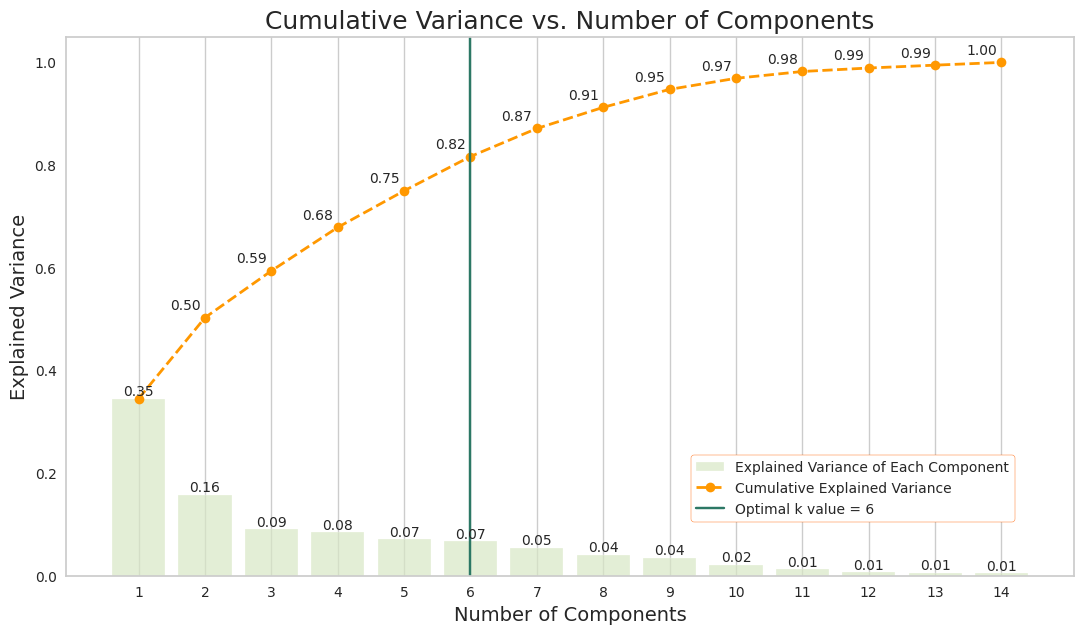

In [ ]:
plt.figure(figsize=(13, 7))
ax = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      alpha=0.7,
                      color='#D9EDBF')

lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#FF9800', linewidth=2)

optimal_k = 6
optimal_k_line = plt.axvline(optimal_k-1, color='#2C7865', linestyle='-', label=f'Optimal k value={optimal_k}')

plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

plt.xticks(range(0, len(cumulative_explained_variance)))

plt.legend(handles=[ax.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,
           edgecolor='#ff6200')

x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')
plt.show()

The plot and the cumulative explained variance values show how much of the total variance in the dataset is covered by each component, as well as the cumulative variance explained by the first n components.

What we can see:
1. The first component explains approximately 35% of the variance.
2. The first two components together explain about 50% of the variance.
3. The first three components explain approximately 59% of the variance, and so on.

To choose the optimal number of components, we generally look for a "elbow point" in the curve. From the plot, we can see that the increase in cumulative variance starts to slow down after the **6th component** (which captures about 82% of the total variance).

In [ ]:
pca = PCA(n_components=6)
customer_data_pca = pca.fit_transform(customer_data_scaled)
customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
customer_data_pca.index = customer_data_scaled.index
customer_data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
CustomerID,,,,,,
12346.0,-2.266110,-1.645564,1.007656,-1.869633,-0.381896,-0.757932
12347.0,3.599453,1.950327,0.000128,0.833220,1.195981,-0.389351
12348.0,0.757299,0.690406,-1.165640,1.363033,1.384213,1.793745
12350.0,-2.022515,0.681792,-0.718131,-1.251218,0.711726,0.684342
12352.0,0.480187,-0.806179,-0.144798,0.230415,1.165465,-0.185079


Next, we will extract the coefficients corresponding to each principal component

In [ ]:
# Define a function to highlight the top 3 absolute values in each column of a dataframe
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #A1C398' if i in top3 else '' for i in column.index]

pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],
                     index=customer_data_scaled.columns)

pc_df.style.apply(highlight_top3, axis=0)

,PC1,PC2,PC3,PC4,PC5,PC6
Days_since_last_purchase,-0.220759,0.073977,0.049270,-0.496230,-0.194466,0.055534
Total_transactions,0.379856,-0.267592,-0.068266,0.076769,0.014864,-0.186060
Total_products_purchased,0.406230,0.066729,-0.007928,0.117825,0.016104,-0.147722
Total_price,0.436126,0.064097,0.003223,0.062865,-0.005917,-0.100235
Average_transaction_value,0.181258,0.577571,0.153172,-0.121680,-0.032810,0.209717
Unique_products_purchased,0.324401,0.026971,-0.323832,0.088476,0.080259,-0.279257
Average_days_between_purchases,-0.021908,-0.160534,0.437264,0.616369,-0.031140,0.467704
Day_of_week,-0.002323,0.013298,-0.519220,0.186885,-0.794018,0.231578
Hour,-0.023585,0.030427,-0.600605,0.016322,0.556513,0.537614
Is_UK,-0.000138,-0.015403,-0.019500,0.011148,0.001207,0.009462


## K-Means clustering

K-Means clustering is an unsupervised learning algorithm, which groups the unlabeled dataset into different clusters

**Possible problems and their solution**

1. K-means clustering requires specifying the number of clusters, beforehand, which may not always be known in advance. To estimate the optimal number of clusters, we will use methods such as the "elbow method" and "silhouette analysis".


2. The K-means clustering algorithm may find a local minimum rather than a global minimum depending on where the initial centroids are placed. To increase the chances of finding the global minimum, we can use the k-means++ initialization technique.

3. The K-means clustering might struggle with clusters of different sizes or densities. Increasing the number of random initializations (n_init) or consider using algorithms that handle unevenly sized clusters better, like GMM or DBSCAN.

### Determining the optimal number of clusters

#### Elbow method

The elbow method is a graphical method for finding the optimal K value in a k-means clustering algorithm.

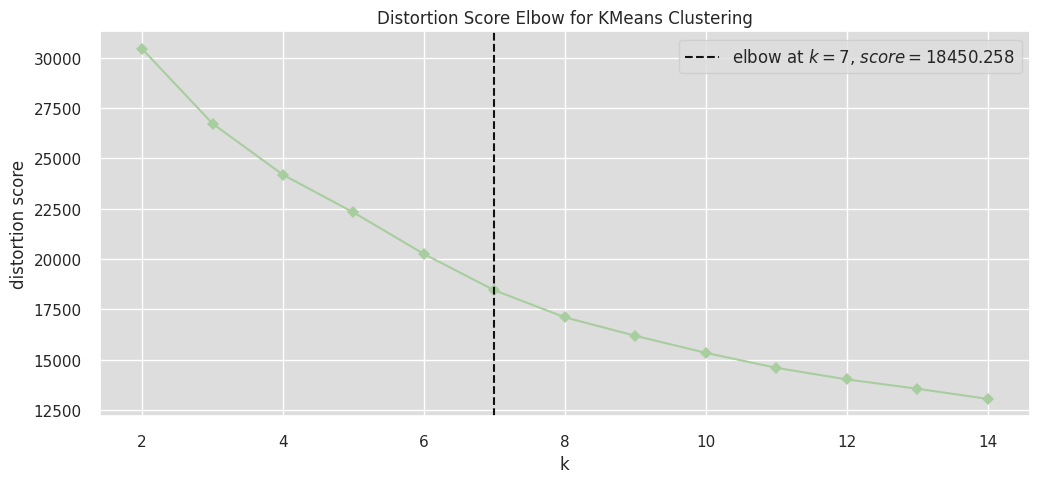

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
sns.set(style='darkgrid', rc={'axes.facecolor': '#DDDDDD'})
sns.set_palette(['#A8CD9F'])

# create the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

fig, ax = plt.subplots(figsize=(12, 5))
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)
visualizer.fit(customer_data_pca)
visualizer.show()

We can observe that the suggested optimal k value is 7. However, from the plot, we can see that the inertia continues to decrease significantly up to k=8, indicating that the optimum value of k could be between 6 and 8.

To choose the best k within this range, we can employ the silhouette analysis.

#### Silhouette method

The silhouette coefficient or silhouette score k-means is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).

In [ ]:
def silhouette_analysis(df, start_k, stop_k, figsize=(15, 16)):
    """
    Perform Silhouette analysis for a range of k values and visualize the results.
    """
    plt.figure(figsize=figsize)

    # Create a grid with (stop_k - start_k + 1) rows and 2 columns
    grid = gridspec.GridSpec(stop_k - start_k + 1, 2)
    # Assign the first plot to the first row and both columns
    first_plot = plt.subplot(grid[0, :])

    silhouette_scores = []
    # Iterate through the range of k values
    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)

    # Add the optimal k value text to the plot
    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='bottom',
             horizontalalignment='left', bbox=dict(facecolor='#fcc36d', edgecolor='#ff6200', boxstyle='round, pad=0.5'))

    for i in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)

        # Assign the plots to the second, third, and fourth rows
        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, ax=ax)
        visualizer.fit(df)

        # Add the Silhouette score text to the plot
        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, \
                ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()

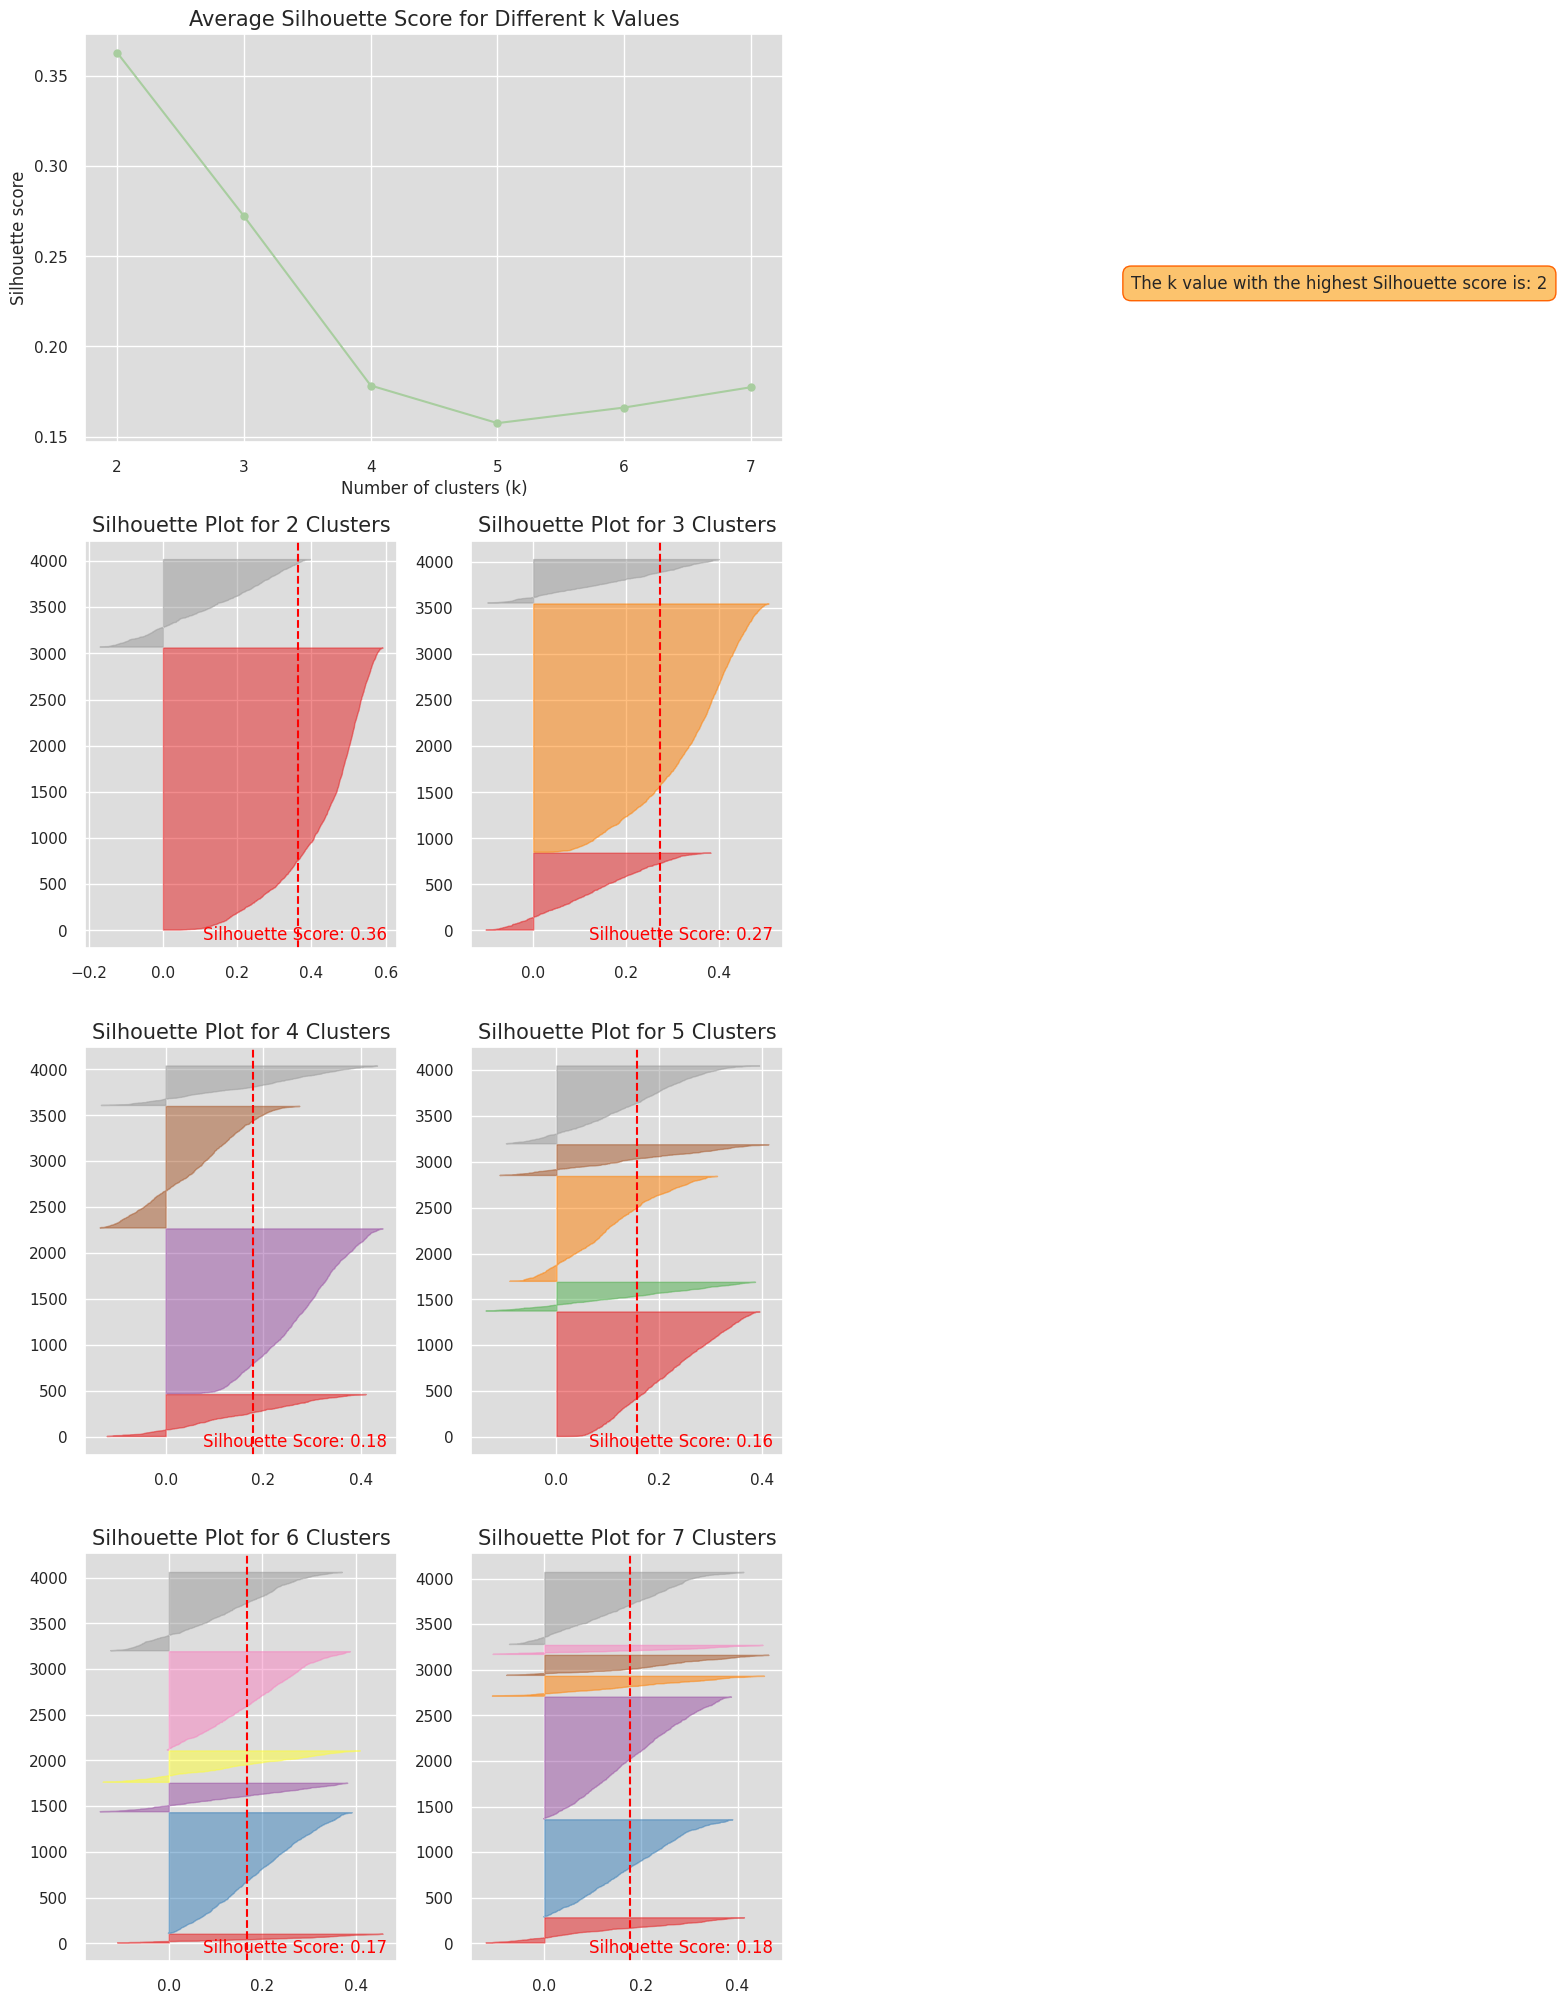

In [ ]:
silhouette_analysis(customer_data_pca, 2, 7, figsize=(20, 30))

After carefully analyzing the graphs above and previous results, k = 3 is the best option. This choice gives us more evenly matched and well-defined clusters, which makes our clustering solution more efficient and reliable.

### Clustering model

In this step, we will apply the K-means algorithm to segment customers into different groups based on their buying patterns and other factors. The optimal number of groups determined in the previous step (k=3).

The K-means algorithm might assign different labels to the clusters in each run. To ensure a consistent label assignment across different runs we are going to swap the labels based on the frequency of samples in each cluster.

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(customer_data_pca)

cluster_frequencies = Counter(kmeans.labels_)
label_mapping = {label: new_label for new_label, (label, _) in
                 enumerate(cluster_frequencies.most_common())}
label_mapping = {v: k for k, v in {2: 1, 1: 0, 0: 2}.items()}
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])
customer_data_cleaned['cluster'] = new_labels

customer_data_pca['cluster'] = new_labels

In [ ]:
customer_data_cleaned.head()

,CustomerID,Days_since_last_purchase,Total_transactions,Total_products_purchased,Total_price,Average_transaction_value,Unique_products_purchased,Average_days_between_purchases,Day_of_week,Hour,Is_UK,Cancellation_frequency,Cancellation_rate,Monthly_spending_mean,Monthly_spending_std,cluster
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.500,0.000000,0.000000,2
1,12347.0,1,7,2458,4310.00,615.714286,103,2.000000,1,14,0,0.0,0.000,615.714286,341.070789,1
2,12348.0,74,4,2332,1437.24,359.310000,21,10.846154,3,19,0,0.0,0.000,359.310000,203.875689,1
3,12350.0,309,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.000,294.400000,0.000000,2
4,12352.0,35,8,463,1265.41,158.176250,57,3.108434,1,14,0,1.0,0.125,316.352500,134.700629,2


### Clustering evaluation

After determining the optimal number of clusters (which is 3 in our case) using elbow and silhouette analyses, I move onto the evaluation step to assess the quality of the clusters formed.
Next, we will evaluate our results and ensure that the clusters are related and well-separated.

#### 3D Visualization of top principal components

Let's start by creating a 3D visualization of 3 top principal components.  clusters to some extent. This will allow us to visually check the quality of the separation and unity between clusters:

In [ ]:
cluster_0 = customer_data_pca[customer_data_pca['cluster'] == 0]
cluster_1 = customer_data_pca[customer_data_pca['cluster'] == 1]
cluster_2 = customer_data_pca[customer_data_pca['cluster'] == 2]

fig = go.Figure()
colors = ['#0095E8', '#E8E300', '#E8000C']

# Add data points for each cluster separately and specify the color
fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'],
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Cluster 0'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'],
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Cluster 1'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'],
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Cluster 2'))

fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#dddddd", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="#dddddd", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="#dddddd", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

fig.show()

In the graph, you can see that the blue (cluster 0) and red (cluster 2) clusters are densely packed and easily distinguishable from each other. The yellow cluster (cluster 1), however, includes points that are significantly distant from each other and are visually separated from the other two clusters.

#### Cluster distribution visualization

Now, we are going to plot distribution of customers in our cluster by plotting bar plot.

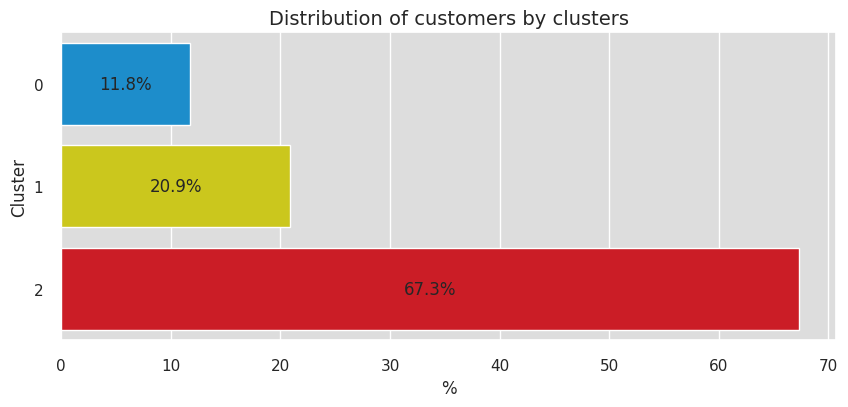

In [ ]:
cluster_percentage = (customer_data_pca['cluster'].value_counts(normalize=True)*100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

plt.figure(figsize=(10, 4))
ax = sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)
for i in ax.containers:
    ax.bar_label(i, label_type='center', fmt='{:.1f}%')
plt.title('Distribution of customers by clusters', fontsize=14)
plt.xlabel('%')
plt.show()

We got a relatively unequal distribution between clusters: cluster 3 includes almost 70% of customers, the first cluster - 21%, the rest is cluster 1.

However, the fact that no cluster contains a very small percentage of customers, assures us that each cluster is significant and not just representing outliers or noise in the data.

To determine the effectiveness of the cluster model, it is also necessary to consider other evaluation metrics.

####  Evaluation metrics

* Silhouette Score: A measure to evaluate the separation distance between the clusters. Higher values indicate better cluster separation. It ranges from -1 to 1.
* Calinski Harabasz Score: This score is used to evaluate the dispersion between and within clusters. A higher score indicates better defined clusters.
* Davies Bouldin Score: It assesses the average similarity between each cluster and its most similar cluster. Lower values indicate better cluster separation

In [ ]:
# Separate the features and the cluster labels
X = customer_data_pca.drop('cluster', axis=1)
clusters = customer_data_pca['cluster']

sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

table_data = pd.DataFrame({'Number of Observations': [len(customer_data_pca)],
                          'Silhouette Score' : [sil_score],
                          'Calinski Harabasz Score':[calinski_score],
                          'Davies Bouldin Score':[davies_score]})
table_data.T

,0
Number of Observations,4003.000000
Silhouette Score,0.272314
Calinski Harabasz Score,1199.347474
Davies Bouldin Score,1.500043


* The Silhouette Score of approximately 0.272, although not close to 1, still indicates a fair amount of separation between the clusters. It suggests that the clusters are somewhat distinct, but there might be slight overlaps between them. Generally, a score closer to 1 would be ideal, indicating more distinct and well-separated clusters.

* The Calinski Harabasz Score is 1199.35, which is considerably high, indicating that the clusters are well-defined. A higher score in this metric generally signals better cluster definitions, thus implying that our clustering has managed to find substantial structure in the data.

* The Davies Bouldin Score of 1.5 is a reasonable score, indicating a moderate level of similarity between each cluster and its most similar one. A lower score is generally better as it indicates less similarity between clusters, and thus, our score here suggests a decent separation between the clusters.

In conclusion, the metrics suggest that the clustering is of decent quality, with clusters being well-defined, but not idealy separated. However, there might still be room for further optimization to enhance cluster separation and definition, potentially by trying other clustering and dimensionality reduction algorithms.

### Cluster analysis and profiling

One of the last steps is to analyze the characteristics of each cluster. We will understand the distinct behaviors and preferences of different customer segments and also profile each cluster to identify the major traits that define the customers in each cluster.

#### Radar chart approach

First, we are going to create radar charts to visualize the centroid values of each cluster across different features.

To plot the radar charts, it's essential to first calculate the centroid for each cluster. This centroid represents the mean value for all features within a specific cluster.

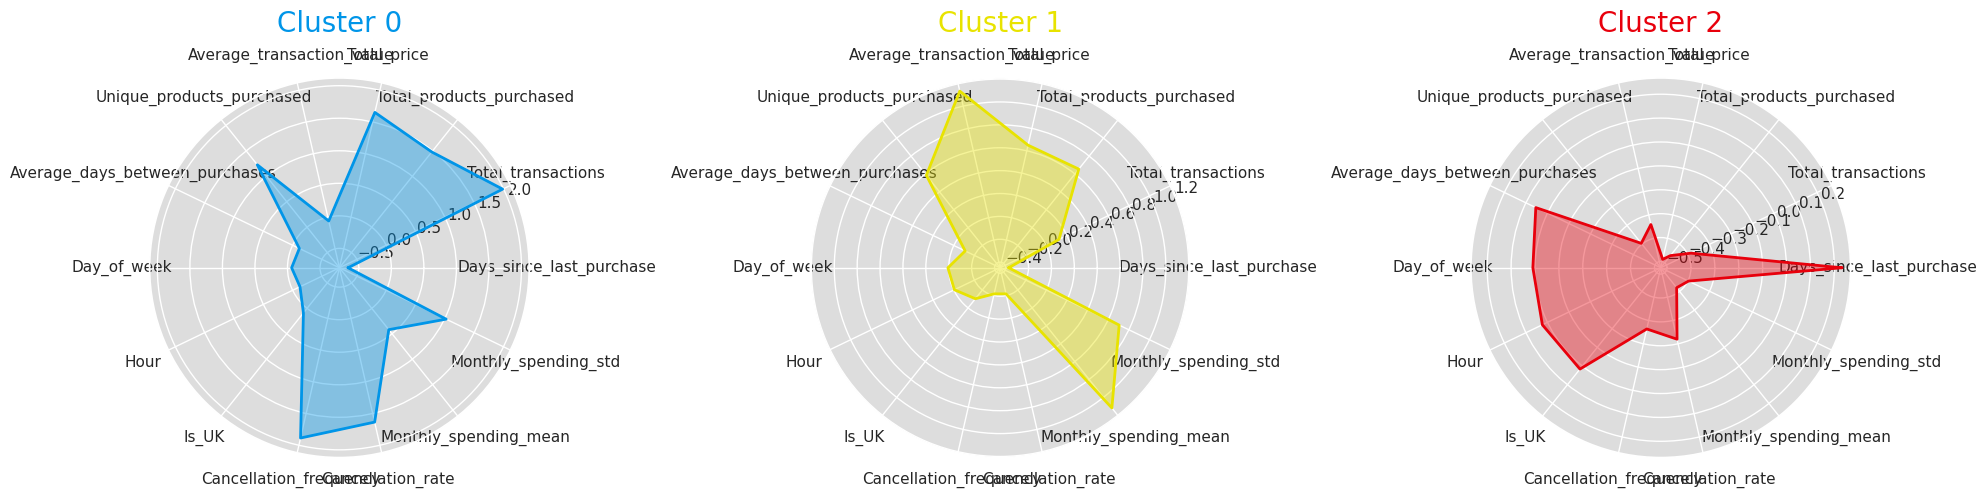

In [ ]:
df_customer = customer_data_cleaned.set_index('CustomerID')

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['cluster'], axis=1))

# New dataframe with standardized values
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized['cluster'] = df_customer['cluster']

# Centroids of each cluster
cluster_centroids = df_customer_standardized.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

labels=np.array(cluster_centroids.columns)
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=3)

for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]
    create_radar_chart(ax[i], angles, data, color, i)

ax[0].set_xticks(angles[:-1])
ax[0].set_xticklabels(labels[:-1])

ax[1].set_xticks(angles[:-1])
ax[1].set_xticklabels(labels[:-1])

ax[2].set_xticks(angles[:-1])
ax[2].set_xticklabels(labels[:-1])

plt.tight_layout()
plt.show()


**Customer's key traits**

**Cluster 0 (Blue):**

In short, frequent high-spenders with a high rate of cancellations.

* Customers in this cluster are have a very high total spend, also they purchase a wide variety of unique products.
* Most of the customers from this cluster are not from the UK.
* They have a large number of totsal purchases, but there are also a lot of cancellations.
* They tend to shop early in the day on Mondays and Tuesdays.
* These customers have a very low average time interval between purchases, and their monthly expenses are medium variable, which indicates that their spending structure may be less predictable compared to other groups.

**Cluster 1 (Yellow):**

In short, infrequent big spenders with a high spending trend

* Customers in this cluster show a moderate level of spending, their transactions are medium frequency, as indicated by Average_days_between_purchases.
* They mainly reside not in the UK.
* They don't have a tendency to cancel transactions, they have low cancellation frequency and rate.
* Their average transaction value and monthly spending mean is high, so they tend to make large purchases.


**Cluster 2 (Red):**

In short: occasional frugal shoppers with a preference for end of the week shopping

* Customers in this cluster tend to spend less, with a lower number of transactions and products purchased.
* They have a slight tendency to shop at the end of the week and in the late hours.
* These customers are mainly from the UK
* They engaged in relatively small number of cancellations.
* The average transaction value is low, they tend to spend less per transaction. Also they have a low monthly spending variation.


#### Histogram chart approach

To verify the accuracy of the profiles identified in the radar plots, we can generate histograms for each object, segregated by cluster label. These histograms allow us to visually inspect the distribution of object values within each group, thereby verifying or clarifying the profiles we have generated based on the radar plots.

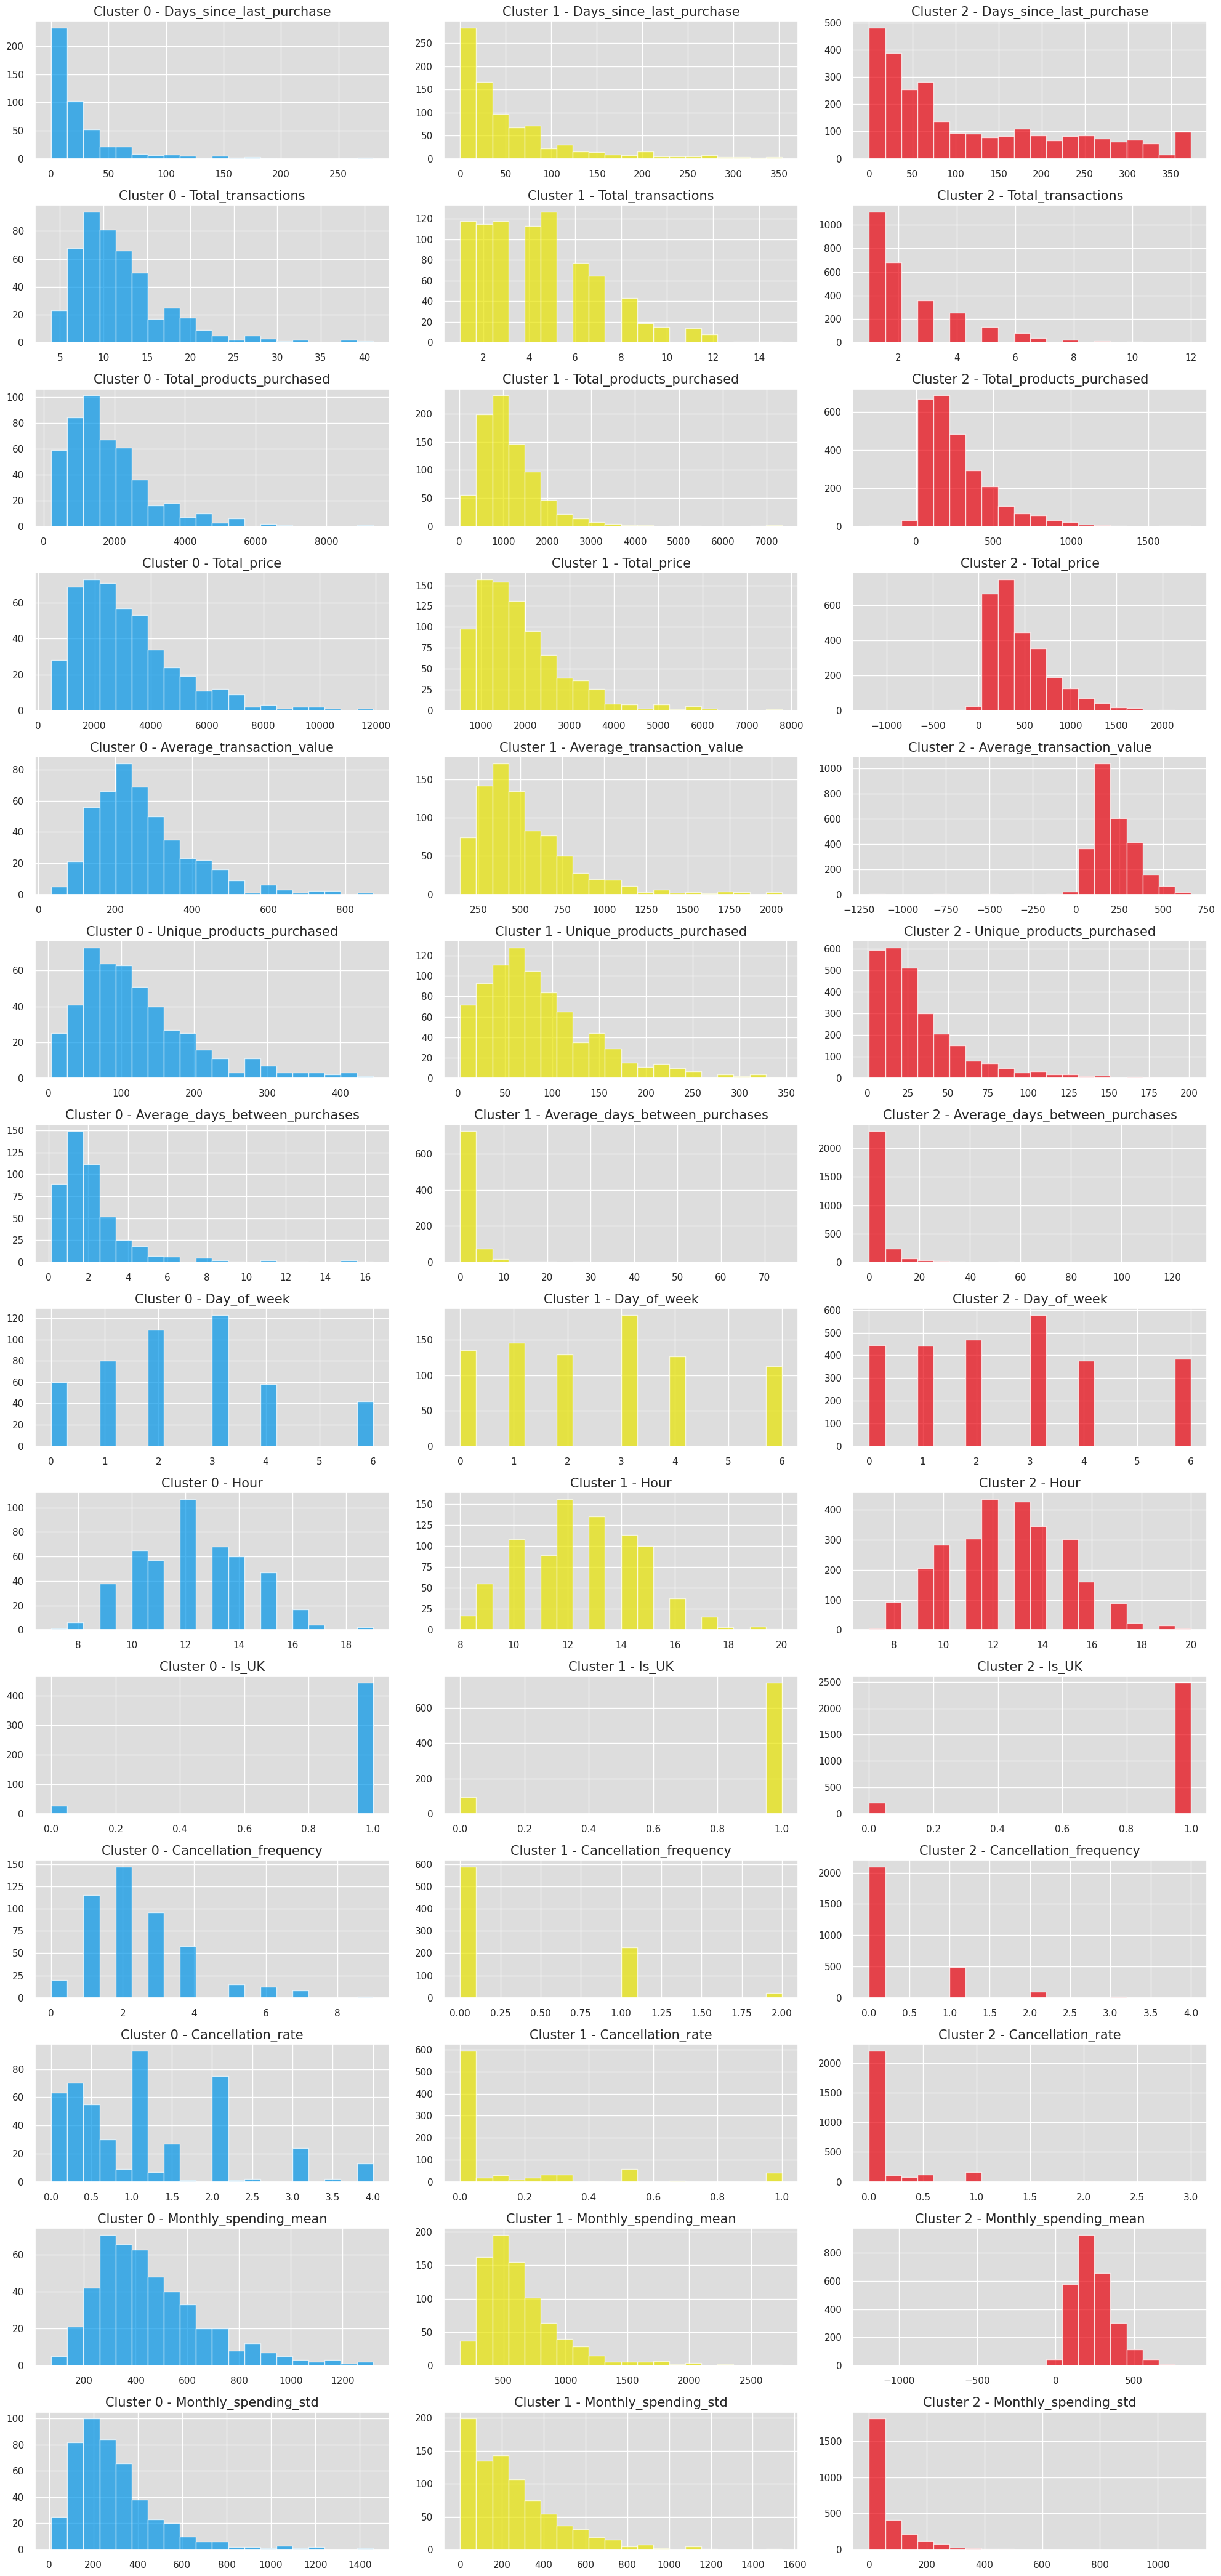

In [ ]:
features = customer_data_cleaned.columns[1:-1]
clusters = customer_data_cleaned['cluster'].unique()
clusters.sort()

n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

plt.tight_layout()
plt.show()

## Final profiles of customers

### Cluster 0:

**Active early-hour customers**

1. Customers in this cluster have high spending habits.
2. They tend to buy a wide variety of unique products and participate in a large number transactions.
3. Despite their high expenditure, they have a tendency to cancel a significant share of their transactions, possibly indicating impulsive buying behaviors.
4. They often shop during the early hours of the day and in the work days.
5. Their spending patterns are quite variable, with high deviations in their monthly spending, indicating a less predictable shopping pattern.

### Cluster 1:

**Irregular big spenders**

1. Customers in this cluster shop infrequently but tend to spend a significant amount of money.
2. Their spending has been on the rise, indicating a growing interest in their purchases.
3. They usually shop in the middle of the day.
4. They have a moderate tendency to cancel transactions, which might be due to their higher spending perhaps reconsider their purchases more often.
6. Their purchases are generally expensive, indicating a preference for quality or premium products.

### Cluster 2:

**Occasional end of the week shoppers**

1. Customers in this cluster generally shop less frequently and spend a lot less money compared to the other clusters.
2. They have a small number of transactions and buy less wide variety of products than in other clusters.
3. Compared to other clusters, these shoppers prefer shopping at the end of the week.
4. They have medium cancellation rate and little deviations in their spending, so we can say these customers have quite stable spending habits and definitive shopping characteristics.
5. Their spending per transaction tends to be lower than other clusters.
6. This cluster has a higher percentage of UK customers than others.

# Conclusion: recommendation system

Lastly, we will develop a recommendation system to enhance the online shopping experience. This system will suggest products to customers based on the purchasing patterns dominant in their suitable clusters.

We are focusing on the core 95% of the customer group. We analyze the cleaned customer data to identify the most popular products within each category.

Using this information, the system can develop personalized recommendations for each user, offering three of their most popular products that they have not yet purchased. This not only helps to develop targeted marketing strategies but also enhances the personal shopping experience and potentially boosts sales. For groups of "outsider" users, a main approach could be to recommend random products as a starting point in order to attract their attention.

In [ ]:
# Extracting CustomerIDs of the outliers and remove their transactions from the main dataframe
outlier_customer_ids = outliers_data['CustomerID'].astype('float').unique()
df_filtered = df[~df['CustomerID'].isin(outlier_customer_ids)]

# Change data type for CustomerID
customer_data_cleaned['CustomerID'] = customer_data_cleaned['CustomerID'].astype('float')

#  Get data with the cluster information for each transaction
merged_data = df_filtered.merge(customer_data_cleaned[['CustomerID', 'cluster']], on='CustomerID', how='inner')

# Top 10 best-sellers in each cluster (depending on the number of sold)
best_selling_products = merged_data.groupby(['cluster', 'StockCode', 'Description'])['Quantity'].sum().reset_index()
best_selling_products = best_selling_products.sort_values(by=['cluster', 'Quantity'], ascending=[True, False])
top_products_per_cluster = best_selling_products.groupby('cluster').head(10)

# Create a record of products purchased by each customer in each cluster
customer_purchases = merged_data.groupby(['CustomerID',
                                          'cluster',
                                          'StockCode'])['Quantity'].sum().reset_index()

# Generate recommendations for each customer in each cluster
recommendations = []
for cluster in top_products_per_cluster['cluster'].unique():
    top_products = top_products_per_cluster[top_products_per_cluster['cluster'] == cluster]
    customers_in_cluster = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster]['CustomerID']

    for customer in customers_in_cluster:
        # Identify products already purchased by the customer
        customer_purchased_products = customer_purchases[(customer_purchases['CustomerID'] == customer) &
                                                         (customer_purchases['cluster'] == cluster)]['StockCode'].tolist()

        # Find top 3 products in the best-selling list that the customer hasn't purchased yet
        top_products_not_purchased = top_products[~top_products['StockCode'].isin(customer_purchased_products)]
        top_3_products_not_purchased = top_products_not_purchased.head(3)

        # Append the recommendations to the list
        recommendations.append([customer, cluster] + top_3_products_not_purchased[['StockCode',
                                                                                   'Description']].values.flatten().tolist())

# Make dataframe from the recommendations list and original customer data
recommendations_df = pd.DataFrame(recommendations, columns=['CustomerID',
                                                            'cluster',
                                                            'Rec1_StockCode',
                                                            'Rec1_Description',
                                                            'Rec2_StockCode',
                                                            'Rec2_Description',
                                                            'Rec3_StockCode',
                                                            'Rec3_Description'])

customer_data_with_recommendations = customer_data_cleaned.merge(recommendations_df, on=['CustomerID',
                                                                                         'cluster'], how='right')

In [ ]:
customer_data_with_recommendations.set_index('CustomerID').iloc[:, -6:].sample(10, random_state=0)

,Rec1_StockCode,Rec1_Description,Rec2_StockCode,Rec2_Description,Rec3_StockCode,Rec3_Description
CustomerID,,,,,,
14480.0,84879,ASSORTED COLOUR BIRD ORNAMENT,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,85123A,WHITE HANGING HEART T-LIGHT HOLDER
13577.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,21212,PACK OF 72 RETROSPOT CAKE CASES
17472.0,84879,ASSORTED COLOUR BIRD ORNAMENT,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,21326,AGED GLASS SILVER T-LIGHT HOLDER
14775.0,84879,ASSORTED COLOUR BIRD ORNAMENT,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,85123A,WHITE HANGING HEART T-LIGHT HOLDER
14214.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,22178,VICTORIAN GLASS HANGING T-LIGHT,84879,ASSORTED COLOUR BIRD ORNAMENT
12670.0,85099B,JUMBO BAG RED RETROSPOT,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT
13482.0,84879,ASSORTED COLOUR BIRD ORNAMENT,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,85123A,WHITE HANGING HEART T-LIGHT HOLDER
17451.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,22178,VICTORIAN GLASS HANGING T-LIGHT,84879,ASSORTED COLOUR BIRD ORNAMENT
17073.0,85099B,JUMBO BAG RED RETROSPOT,84879,ASSORTED COLOUR BIRD ORNAMENT,21212,PACK OF 72 RETROSPOT CAKE CASES


As a result, we have received a dataframe that lists the products that customers are likely to want to purchase for the first time based on their cluster.

The model can be improved, as we did not achieve the best distribution of clusters, and the final dataframe can be enhanced in terms of the ease of adding new data.

Many thanks to these authors for their excellent work on the same dataset:

https://www.kaggle.com/huseyincosgun

https://www.kaggle.com/fabiendaniel

https://www.kaggle.com/farzadnekouei